In [1]:
import pandas as pd
import numpy as np

%precision %.3f # jupyter notebook 소수점 3자리로 제한
pd.set_option('precision', 3) # pandas 소수점 3자리로 제한

In [2]:
# 데이터 불러오기
path = './data/ch2_scores_em.csv'

In [3]:
df = pd.read_csv(path, index_col='student number')

In [4]:
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [5]:
scores = df['english']
scores.head()

student number
1    42
2    69
3    56
4    41
5    57
Name: english, dtype: int64

## 평균

In [6]:
mean = np.mean(scores)
mean

58.38

## 편차

In [7]:
deviation = scores - mean
deviation.head()

student number
1   -16.38
2    10.62
3    -2.38
4   -17.38
5    -1.38
Name: english, dtype: float64

## 분산  
numpy에서는 표본분산, pandas에서는 불편분산을 사용

In [8]:
summary_df = df.copy()
summary_df['deviation'] = deviation
summary_df.head()

,english,mathematics,deviation
student number,,,
1,42,65,-16.38
2,69,80,10.62
3,56,63,-2.38
4,41,63,-17.38
5,57,76,-1.38


### numpy 분산 (표본분산)

In [9]:
np.var(scores)

94.1156

In [10]:
np.mean(deviation ** 2)

94.1156

### pandas 분산 (불편분산)

In [11]:
df.var()

english        96.036
mathematics    70.802
dtype: float64

### pandas 분산 (표본분산)  
ddof = 0을 주면 된다.

In [12]:
df.var(ddof=0)

english        94.116
mathematics    69.386
dtype: float64

## 표준편차

In [13]:
np.std(scores)

9.70131949788275

In [14]:
df.std(ddof=0)

english        9.701
mathematics    8.330
dtype: float64

## 사분위범위  
$IQR = Q3 - Q1$

In [15]:
scores_Q1 = np.percentile(scores, 25) # array를 오름차순으로 정렬된 값들 중 percentage에 해당하는 값을 반환
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

11.0

## 정리

In [16]:
df.describe()

,english,mathematics
count,50.00,50.000
mean,58.38,78.880
std,9.80,8.414
min,37.00,57.000
25%,54.00,76.000
50%,57.50,80.000
75%,65.00,84.000
max,79.00,94.000


## 표준화

In [17]:
z = (df-df.mean())/df.std(ddof=0)
z.head()

,english,mathematics
student number,,
1,-1.688,-1.666
2,1.095,0.134
3,-0.245,-1.906
4,-1.792,-1.906
5,-0.142,-0.346


In [18]:
z.mean()

english       -2.442e-16
mathematics    5.418e-16
dtype: float64

In [19]:
z.std(ddof=0)

english        1.0
mathematics    1.0
dtype: float64

## 편찻값  
평균을 m, 표준편차를 s로 하고 싶은 경우  
$z_i = m + s \times {{x_i-x} \over {S}}$

In [20]:
m = 50
s = 10
z = 50 + 10 * (df-df.mean())/df.std(ddof=0)
z.head()

,english,mathematics
student number,,
1,33.116,33.337
2,60.947,51.345
3,47.547,30.936
4,32.085,30.936
5,48.578,46.543


In [21]:
z.mean(), z.std(ddof=0)

(english        50.0
 mathematics    50.0
 dtype: float64,
 english        10.0
 mathematics    10.0
 dtype: float64)

## 데이터 시각화

### 도수분포표

In [22]:
freq, _ = np.histogram(scores, bins=10, range=(0,100)) # bins : 계급 수, range : 최댓값, 최솟값
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [23]:
# 0~10, 10~20, ... 문자열 리스트
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]

# freq_class를 index로 갖는 DataFrame 생성
freq_dist_df = pd.DataFrame({'frequency':freq}, index=pd.Index(freq_class, name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


### 계급값  
: 계급의 중앙값  

### 상대도수  
: 비율(빈도/전체)  

### 누적상대도수  
: 누적비율

In [24]:
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [25]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [26]:
cum_rel_freq = np.cumsum(rel_freq) # 누적합
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [27]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df

,frequency,class value,relative frequency,cumulative relative frequency
class,,,,
0~10,0,5,0.00,0.00
10~20,0,15,0.00,0.00
20~30,0,25,0.00,0.00
30~40,2,35,0.04,0.04
40~50,8,45,0.16,0.20
50~60,16,55,0.32,0.52
60~70,18,65,0.36,0.88
70~80,6,75,0.12,1.00
80~90,0,85,0.00,1.00


### 최빈값

In [28]:
idx = freq_dist_df['frequency'].idxmax()
idx

'60~70'

In [29]:
freq_dist_df.loc[idx, 'class value']

65

## 히스토그램

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

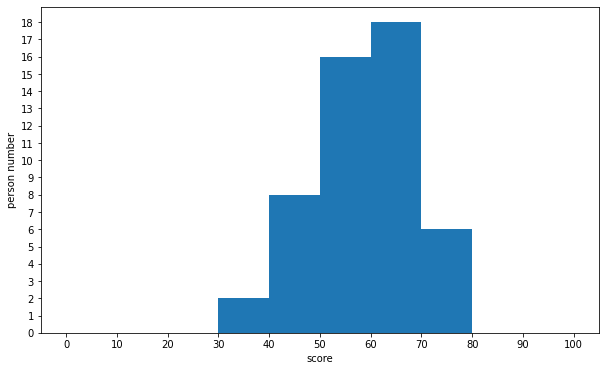

In [31]:
# 캔버스 생성 후 가로, 세로 길이 설정
fig = plt.figure(figsize=(10, 6))
# 캔버스 위에 그래프를 그리기 위한 영역 지정
# 인수는 영역을 1x1개 지정, 하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 하여 히스토그램 그림
freq, _, _ = ax.hist(scores, bins=10, range=(0, 100))
# X축, Y축 레이블
ax.set_xlabel('score')
ax.set_ylabel('person number')
# 눈금 지정
ax.set_xticks(np.linspace(0, 100, 10+1)) # np.linspace(start, end, num) : start부터 end까지 num개로 나눈 구간 생성
ax.set_yticks(np.arange(0, freq.max()+1)) # np.arange(start, end, num=1) : start부터 end-1까지 num 간격으로 생성

plt.show()

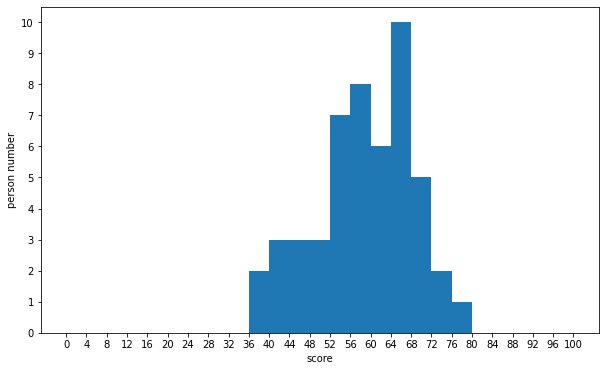

In [32]:
# 4점 간격으로 생성
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(scores, bins=25, range=(0, 100))

ax.set_xlabel('score')
ax.set_ylabel('person number')

ax.set_xticks(np.linspace(0, 100, 25+1)) 
ax.set_yticks(np.arange(0, freq.max()+1)) 

plt.show()

### 상대도수 히스토그램 + 누적상대도수 꺾은선 그래프

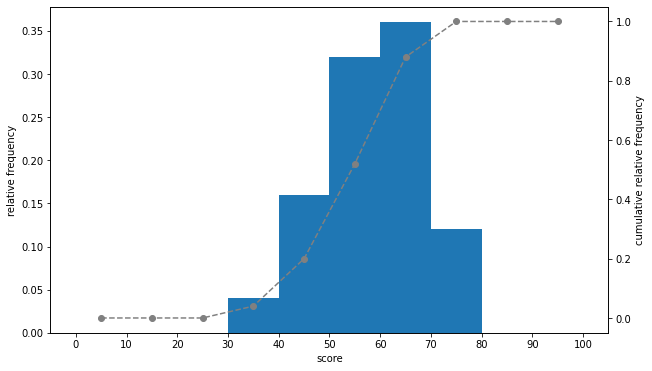

In [33]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

weights = np.ones_like(scores)/len(scores) # np.ones_like(array) : array와 길이가 같은 1로만 이루어진 array 생성
rel_freq, _, _ = ax1.hist(scores, bins=10, range=(0, 100), weights=weights) # weights : 각 값별로 weight를 줌 (기본값 1)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
# 꺾은선 그래프
# 점선, marker를 o, gray
ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='gray')
# 꺾은선 그래프 눈금선 제거
ax2.grid(visible = False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 10+1))

plt.show()

## 상자그림  
상한 : Q3+1.5\*IQR    
하한 : Q1-1.5\*IQR  
박스 : Q3\~Q1(IQR)  
중앙 선 : 중앙값(Q2)  
o (점) : outlier

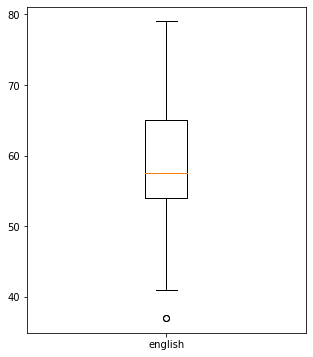

In [34]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(scores, labels=['english'])

plt.show()

#### 히스토그램, 누적상대도수 그래프 그리기  
단점 : freq를 두 번 써야하기 때문에 메모리 누수가 있다.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = './data/ch2_scores_em.csv'
df = pd.read_csv(path, index_col='student number')
scores = np.array(df['english'])
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]

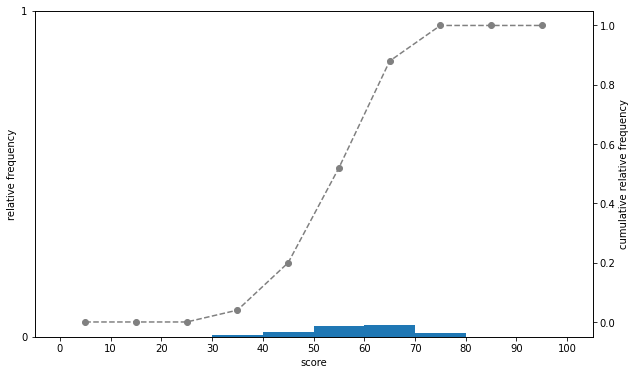

In [10]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

freq, _, _ = ax1.hist(scores, bins=10, density=True, range=(0, 100))
ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='gray')
ax2.grid(visible = False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 10+1))
ax1.set_yticks(np.arange(0, freq.max()+1))

plt.show()